# Airquality analysis v1.2

### Description
With this notebook you can analyze and plot the content of the airquality database.
Go through the notebook cell by cell and fill in the missing ToDos

---

### Python import and data query

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3

from matplotlib.dates import DateFormatter

%matplotlib inline

### Data import from the database

In [141]:
db_path = 'airquality.db' #path to airquality.db
con = sqlite3.connect(db_path)

# import all datapoints from each sensor
no2 = pd.read_sql_query("SELECT * from NO2", con)
co = pd.read_sql_query("SELECT * from CO", con)
o3 = pd.read_sql_query("SELECT * from O3", con)

# configure the table for easier usage and drop useless columns
no2.index = pd.to_datetime(no2['timestamp'])
co.index = pd.to_datetime(co['timestamp'])
o3.index = pd.to_datetime(o3['timestamp'])

no2.drop(['id', 'timestamp'], axis = 1, inplace = True)
co.drop(['id', 'timestamp'], axis = 1, inplace = True)
o3.drop(['id', 'timestamp'], axis = 1, inplace = True)

# display the import with DataFrame.head()
print(no2.head())
print(no2.dtypes)

                            value unit  temperature   humidity
timestamp                                                     
2022-04-21 10:20:38.333760  0.008  ppm    18.722000  26.190000
2022-04-21 10:21:21.865158  0.007  ppm    18.453333  27.433333
2022-04-21 10:22:03.940100  0.007  ppm    17.168000  28.387333
2022-04-21 10:22:47.489067  0.007  ppm    16.590000  30.186667
2022-04-21 10:23:29.985511  0.007  ppm    17.376667  29.500000
value          float64
unit            object
temperature    float64
humidity       float64
dtype: object


---
### Basic infromation and stats about the data
As of now we have the data imported from the database and can work with it in the notebook. 
With DataFrame.head() you can easily investigate the first column of the db visually. We will now investigate the data a bit more in detail and will:
- arithmetic average
- variance

Use DataFrame.describe() to calculate the values and print it in a readable format. 
For the temperature and Humidity you only need to plot the data in one table since the entries are identical. 

In [142]:
no2_stats = no2.describe()
o3_stats = o3.describe()
co_stats = co.describe()

print('Average NO2 value: {0:.1f} ppb +-{1:.1f} ppb '.format((no2_stats['value']['mean']*1000), no2_stats['value']['std']*1000))
print('Average O3 value: {0:.1f} ppb +-{1:.1f} ppb '.format((o3_stats['value']['mean']), o3_stats['value']['std']))
print('Average CO value: {0:.1f} ppb +-{1:.1f} ppb '.format((co_stats['value']['mean']*1000), co_stats['value']['std']*1000))
print("--")
print('Average temperature: {0:.1f} °C'.format(co_stats['temperature']['mean']))
print('Average humidity: {0:.1f} % rH'.format(co_stats['humidity']['mean']))

Average NO2 value: 8.5 ppb +-2.0 ppb 
Average O3 value: 48.7 ppb +-7.0 ppb 
Average CO value: 27.0 ppb +-83.4 ppb 
--
Average temperature: 16.6 °C
Average humidity: 30.6 % rH


---
## Conversion to volumentric units
Now we want to convert the data from concentration to volumetric values. 
Have a look into the tabel find the right conversion factor. 

In [143]:
o3_factor = 1.96
co_factor = 1.15
no2_factor = 1.88

no2['mass_value'] = no2['value'] * no2_factor 
co['mass_value'] = co['value'] * co_factor 
o3['mass_value'] = o3['value'] * o3_factor 

### Plot the raw data

Now it is time to plot the values of each sensor on a scatterplot. 

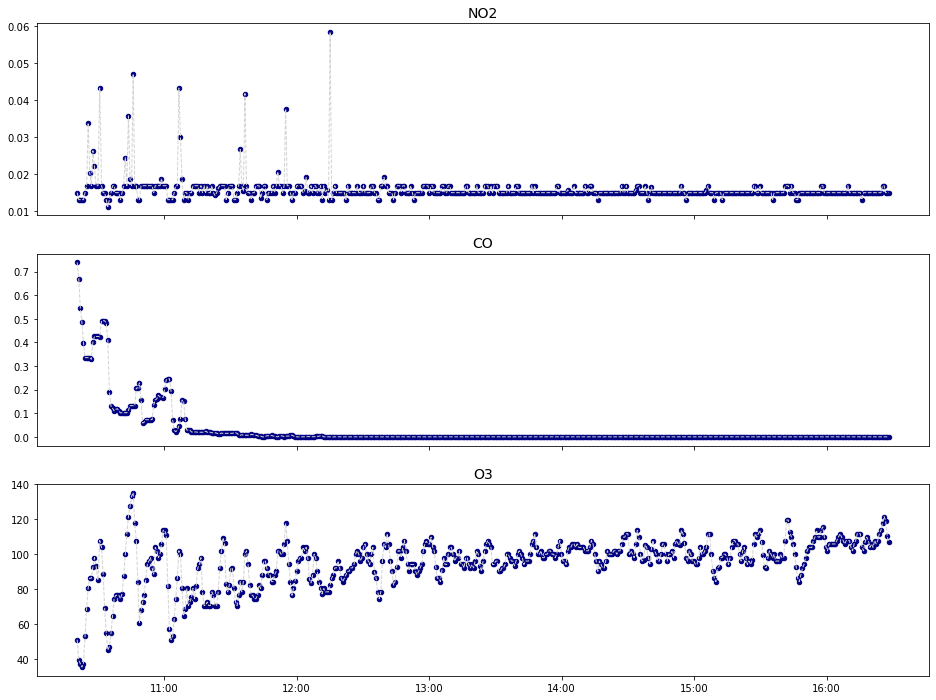

In [144]:
#no2 plot
fig, ax = plt.subplots(3,1, figsize=(16,12), sharex = True)

ax[0].plot(no2["mass_value"], color = 'lightgrey', linewidth = 1, linestyle='--')
ax[0].scatter(y=no2["mass_value"], x = no2.index, color = 'navy', s = 20)
ax[0].set_title('NO2', size = 14)

ax[1].plot(co["mass_value"], color = 'lightgrey', linewidth = 1, linestyle='--')
ax[1].scatter(y=co["mass_value"], x = co.index, color = 'navy', s = 20)
ax[1].set_title('CO', size = 14)

ax[2].plot(o3["mass_value"], color = 'lightgrey', linewidth = 1, linestyle='--')
ax[2].scatter(y=o3["mass_value"], x = o3.index, color = 'navy', s = 20)
ax[2].set_title('O3', size = 14)

hh_mm = DateFormatter('%H:%M')
ax[2].xaxis.set_major_formatter(hh_mm)


### Plot temperature and humidity in same timeframe

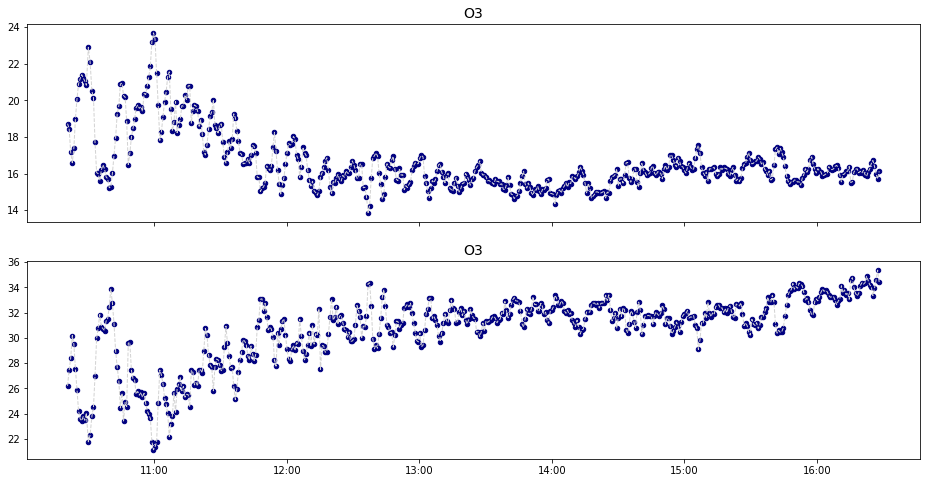

In [145]:
#no2 plot
fig, ax = plt.subplots(2,1,figsize=(16,8), sharex = True)

ax[0].plot(o3["temperature"], color = 'lightgrey', linewidth = 1, linestyle='--')
ax[0].scatter(y=o3["temperature"], x = o3.index, color = 'navy', s = 20)
ax[0].set_title('O3', size = 14)

ax[1].plot(o3["humidity"], color = 'lightgrey', linewidth = 1, linestyle='--')
ax[1].scatter(y=o3["humidity"], x = o3.index, color = 'navy', s = 20)
ax[1].set_title('O3', size = 14)


hh_mm = DateFormatter('%H:%M')
ax[1].xaxis.set_major_formatter(hh_mm)


## Interpretation of the data

-> is the sensor useful? 
-> what can we see from the data? 

## Resampling the data and cut a specific timeframe

find a timeframe where 

In [146]:
no2 = no2.resample('1H').mean()
co = co.resample('1H').mean()
o3 = o3.resample('1H').mean()



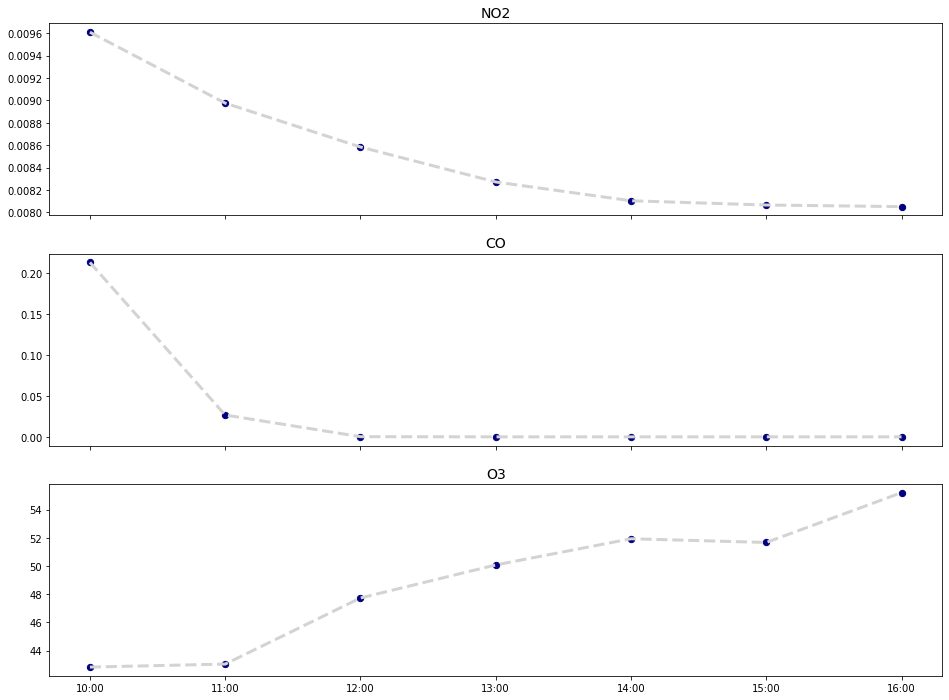

In [147]:
#no2 plot
fig, ax = plt.subplots(3,1, figsize=(16,12), sharex = True)

ax[0].plot(no2["value"], color = 'lightgrey', linewidth = 3, linestyle='--')
ax[0].scatter(y=no2["value"], x = no2.index, color = 'navy', s = 40)
ax[0].set_title('NO2', size = 14)

ax[1].plot(co["value"], color = 'lightgrey', linewidth = 3, linestyle='--')
ax[1].scatter(y=co["value"], x = co.index, color = 'navy', s = 40)
ax[1].set_title('CO', size = 14)

ax[2].plot(o3["value"], color = 'lightgrey', linewidth = 3, linestyle='--')
ax[2].scatter(y=o3["value"], x = o3.index, color = 'navy', s = 40)
ax[2].set_title('O3', size = 14)

hh_mm = DateFormatter('%H:%M')
ax[2].xaxis.set_major_formatter(hh_mm)
